In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
def drawImg(X, Y, i):
    plt.title(str(Y[i]))
    plt.imshow(X[i], cmap='gray')
    plt.show()

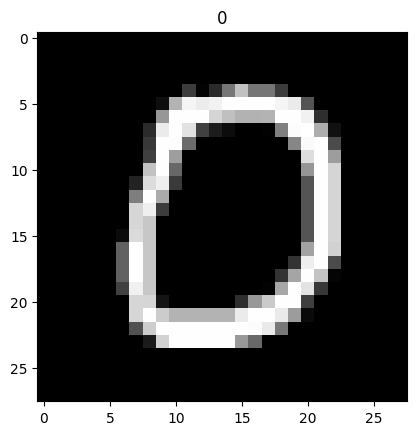

In [4]:
drawImg(testX, testY, 10)

In [5]:
X = testX.reshape((-1, 28*28))
Y = testY

## Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
X_ = sc.fit_transform(X)
X_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

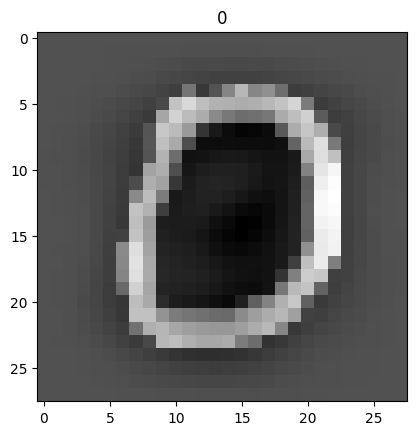

In [10]:
drawImg(X_.reshape((-1, 28, 28)), Y, 10)

In [11]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=3)

In [40]:
z_pca = pca.fit_transform(X_)
z_pca.shape

(10000, 3)

In [41]:
z_pca

array([[-5.45835941,  6.41354867, -4.19880234],
       [ 2.80431644, -8.02982006, 16.1881083 ],
       [-7.41123235, -3.86406189,  1.08962787],
       ...,
       [-5.00435628,  1.15403169, -5.01804748],
       [-1.42086552, -4.42276321, -7.00828065],
       [13.14271926, -4.26295688, -1.14532223]])

In [42]:
pca.explained_variance_

array([41.39893397, 28.35105801, 27.01964605])

## Compute Custom Covariance [PCA]

In [48]:
covar = np.dot(X_.T, X_)

In [49]:
covar.shape

(784, 784)

## Compute Eigen Vectors

In [50]:
from numpy.linalg import svd

In [51]:
U, S, V = svd(covar)
U

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
Ured = U[:, :3]

In [53]:
U.shape

(784, 784)

## Projection

In [54]:
z = np.dot(X_, Ured)

In [55]:
z.shape

(10000, 3)

In [56]:
Y.shape

(10000,)

In [57]:
new_dataset = np.hstack((z, Y.reshape((-1, 1))))
new_dataset

array([[  5.45831116,   6.41400668,  -4.19942366,   7.        ],
       [ -2.80443233,  -8.02885014,  16.18577955,   2.        ],
       [  7.41124146,  -3.86404387,   1.08959777,   1.        ],
       ...,
       [  5.00435204,   1.15364641,  -5.01710348,   4.        ],
       [  1.42085442,  -4.42308066,  -7.00728815,   5.        ],
       [-13.14268302,  -4.26280299,  -1.14624747,   6.        ]])

In [58]:
df = pd.DataFrame(new_dataset, columns=["PC1", "PC2", "PC3", "label"])
df.head()

,PC1,PC2,PC3,label
0,5.458311,6.414007,-4.199424,7.0
1,-2.804432,-8.028850,16.185780,2.0
2,7.411241,-3.864044,1.089598,1.0
3,-8.751242,0.045991,-2.851232,0.0
4,0.065756,6.296290,-0.396556,4.0


In [59]:
corr = df.corr()
corr

,PC1,PC2,PC3,label
PC1,1.000000e+00,3.229765e-16,2.475019e-16,0.281307
PC2,3.229765e-16,1.000000e+00,3.958110e-16,0.395467
PC3,2.475019e-16,3.958110e-16,1.000000e+00,-0.159108
label,2.813074e-01,3.954666e-01,-1.591083e-01,1.000000


In [60]:
import seaborn as sns

<Axes: >

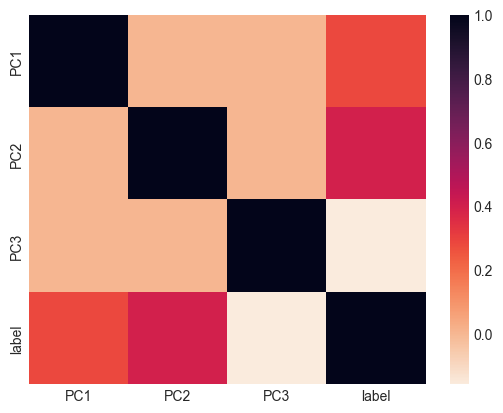

In [61]:
sns.heatmap(corr, cmap='rocket_r')

<Figure size 1000x1000 with 0 Axes>

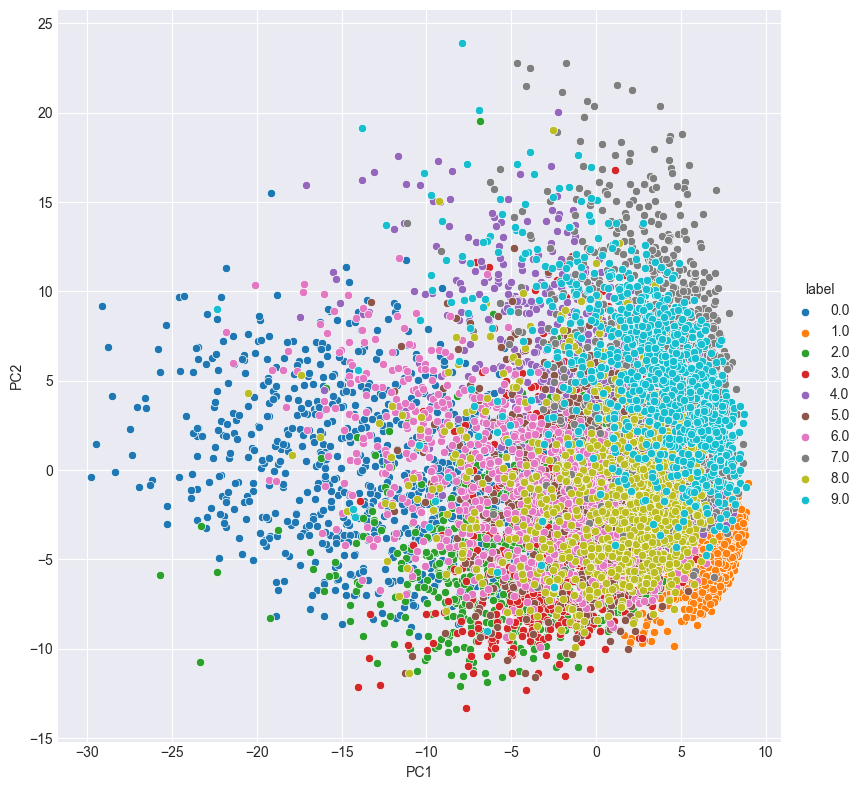

In [67]:
import seaborn as sns
plt.figure(figsize=((10,10)))
fg = sns.FacetGrid(df, hue="label", height=8)
fg.map(sns.scatterplot, "PC1", "PC2")
fg.add_legend()
plt.show()

In [31]:
pca = PCA()

In [32]:
X_.shape

(10000, 784)

In [33]:
pca.fit_transform(X_)

array([[-5.45831116e+00,  6.41400668e+00, -4.19942366e+00, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.80443233e+00, -8.02885014e+00,  1.61857796e+01, ...,
        -6.28087164e-16,  9.75225450e-16, -6.17134839e-17],
       [-7.41124146e+00, -3.86404387e+00,  1.08959777e+00, ...,
         1.28080707e-15, -9.28479151e-17, -1.48689608e-17],
       ...,
       [-5.00435204e+00,  1.15364641e+00, -5.01710348e+00, ...,
        -1.87825781e-17,  1.74162196e-17, -8.81675501e-18],
       [-1.42085442e+00, -4.42308066e+00, -7.00728815e+00, ...,
        -2.93636756e-17, -8.64734288e-17, -1.82570207e-17],
       [ 1.31426830e+01, -4.26280299e+00, -1.14624747e+00, ...,
        -4.53818381e-18,  3.43009003e-17, -1.44901380e-17]])

In [34]:
pca.explained_variance_

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [35]:
pca.explained_variance_ratio_

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [36]:
pca.explained_variance_ / np.sum(pca.explained_variance_)

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [37]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
cum_var_explained

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

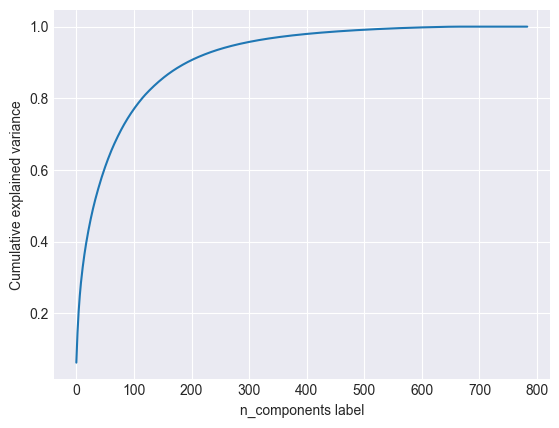

In [38]:
plt.style.use("seaborn-darkgrid")
plt.plot(cum_var_explained)
plt.xlabel("n_components label")
plt.ylabel("Cumulative explained variance")
plt.show()